# Sales Analysis

In [111]:
#### Import necessary libraries & read csv file 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('all_data.csv', skiprows=[2])
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186844,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186845,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186846,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186847,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Clean up the data!
The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data

In [36]:
df.shape

(186850, 6)

### Drop rows of NAN 

In [71]:
df.columns[df.isna().any()]

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [72]:
df = df.dropna()

In [39]:
df.shape

(186305, 6)

In [73]:
df.columns[df.isna().any()]

Index([], dtype='object')

### Get rid of text in "order date" column and then convert it into datetime

In [113]:
df['Order Date'] = df['Order Date'].str.split(' ').str[0]

df['Order Date']

0         04/19/19
1         04/07/19
2         04/12/19
3         04/12/19
4         04/30/19
            ...   
186844    09/17/19
186845    09/01/19
186846    09/23/19
186847    09/19/19
186848    09/30/19
Name: Order Date, Length: 186849, dtype: object

In [114]:
df['Order Date'] = pd.to_datetime(df['Order Date'],format='%m/%d/%y',errors='coerce')
df['Order Date']

0        2019-04-19
1        2019-04-07
2        2019-04-12
3        2019-04-12
4        2019-04-30
            ...    
186844   2019-09-17
186845   2019-09-01
186846   2019-09-23
186847   2019-09-19
186848   2019-09-30
Name: Order Date, Length: 186849, dtype: datetime64[ns]

### Make columns correct type ( By using __" to_numeric " __  , Convert the columns with numeric values into           integer or float ) . 
check this link to know how to use it  https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html

In [79]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,2019-04-12,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,2019-04-12,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,2019-04-30,"333 8th St, Los Angeles, CA 90001"


In [123]:
df['Quantity Ordered']= pd.to_numeric(df['Quantity Ordered'],  downcast="integer", errors='coerce')
df['Order ID']= pd.to_numeric(df['Order ID'],  downcast="integer", errors='coerce')
df['Price Each']= pd.to_numeric(df['Price Each'],  downcast="float", errors='coerce')

In [81]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.950000,2019-04-19,"917 1st St, Dallas, TX 75001"
1,176559.0,Bose SoundSport Headphones,1.0,99.989998,2019-04-07,"682 Chestnut St, Boston, MA 02215"
2,176560.0,Google Phone,1.0,600.000000,2019-04-12,"669 Spruce St, Los Angeles, CA 90001"
3,176560.0,Wired Headphones,1.0,11.990000,2019-04-12,"669 Spruce St, Los Angeles, CA 90001"
4,176561.0,Wired Headphones,1.0,11.990000,2019-04-30,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186844,259353.0,AAA Batteries (4-pack),3.0,2.990000,2019-09-17,"840 Highland St, Los Angeles, CA 90001"
186845,259354.0,iPhone,1.0,700.000000,2019-09-01,"216 Dogwood St, San Francisco, CA 94016"
186846,259355.0,iPhone,1.0,700.000000,2019-09-23,"220 12th St, San Francisco, CA 94016"
186847,259356.0,34in Ultrawide Monitor,1.0,379.989990,2019-09-19,"511 Forest St, San Francisco, CA 94016"


### Augment data with additional columns

In [82]:
#### Add month column
df['Month'] =pd.to_datetime(df['Order Date']).dt.month

C:\Users\DELL\AppData\Local\Temp\ipykernel_8864\2205621608.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] =pd.to_datetime(df['Order Date']).dt.month


In [83]:
df['Month']

0         4.0
1         4.0
2         4.0
3         4.0
4         4.0
         ... 
186844    9.0
186845    9.0
186846    9.0
186847    9.0
186848    9.0
Name: Month, Length: 186305, dtype: float64

In [89]:
#### Add city column (containing city & state in this columns.) ex: df['City'][0] = 'Dallas (TX)'
def get_city_state(address):
    try:    
        city = address.split(',')[1].strip()
        state = address.split(',')[2].split(' ')[1].strip()
        return f'{city} ({state})'
    except (IndexError, AttributeError):
        return ''
   
df['City'] = df['Purchase Address'].apply(get_city_state)

C:\Users\DELL\AppData\Local\Temp\ipykernel_8864\3841033345.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City'] = df['Purchase Address'].apply(get_city_state)


In [90]:
df['City']

0                Dallas (TX)
1                Boston (MA)
2           Los Angeles (CA)
3           Los Angeles (CA)
4           Los Angeles (CA)
                 ...        
186844      Los Angeles (CA)
186845    San Francisco (CA)
186846    San Francisco (CA)
186847    San Francisco (CA)
186848    San Francisco (CA)
Name: City, Length: 186305, dtype: object

## Data Exploration!

In [59]:
#### Question 1: What was the best month for sales? How much was earned that month?
#Dec 12

## sales = Quantity_order x price Each

In [91]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

C:\Users\DELL\AppData\Local\Temp\ipykernel_8864\1983597858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales'] = df['Quantity Ordered'] * df['Price Each']


In [93]:
monthly_sales = df.groupby('Month')['Sales'].sum()

In [94]:
best_month = monthly_sales.idxmax()
best_month

12.0

In [98]:
#### Question 2: What city sold the most product?
#San Francisco (CA)

In [ ]:
city_sales = df.groupby('City')['Quantity Ordered'].sum()

In [97]:
best_city = city_sales.idxmax()
best_city

'San Francisco (CA)'

In [118]:
#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?
## Step1: Add hour column
df['Hour'] = df['Order Date'].dt.hour

In [119]:
df['Hour']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
186844    0.0
186845    0.0
186846    0.0
186847    0.0
186848    0.0
Name: Hour, Length: 186849, dtype: float64

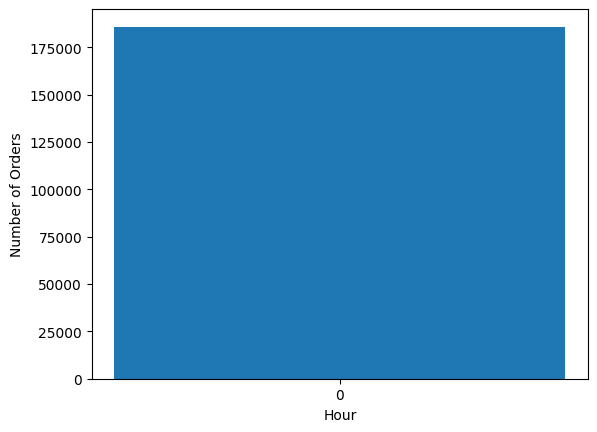

In [120]:
## Step2: show by using plot , get the most hour which clients make orders
hourly_orders = df.groupby('Hour').size()

plt.bar(hourly_orders.index, hourly_orders.values)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.xticks(hourly_orders.index)
plt.show()

In [121]:
#the most hour which clients make orders
best_hour = hourly_orders.idxmax()
best_hour

0.0

In [125]:
#### Question 4: What products are most often sold together?
grouped_products = df.groupby('Order ID')['Product'].apply(list)


In [128]:
df['Order ID'].duplicated()

0         False
1         False
2         False
3          True
4         False
          ...  
186844    False
186845    False
186846    False
186847    False
186848    False
Name: Order ID, Length: 186849, dtype: bool

In [124]:
#### What product sold the most? Why do you think it sold the most?
#AAA Batteries (4-pack)

'AAA Batteries (4-pack)'

In [ ]:
product_sales = df.groupby('Product')['Quantity Ordered'].sum()
best_product = product_sales.idxmax()
best_product